In [27]:
# draw a confusion matrix on the prediction results and the ground truth
predictions_path = '../predictions/finetune-sst-dev-out.csv'
ground_truth_path = '../data/ids-sst-dev.csv'
color = 'Blues'
output_path = './sst_confusion_blue.png'

In [28]:
g_id , g_sentence, g_sentiment = [], [], []
with open(ground_truth_path, 'r') as f:
    next(f)
    for line in f:
        _,  id_, sentence_, sentiment_ = line.strip().split('\t')
        g_id.append(id_)
        g_sentence.append(sentence_)
        g_sentiment.append(sentiment_)

In [29]:
print(g_id[:3])
print(g_sentence[:3])
print(g_sentiment[:3])

['a7d575c9ed86ea9633660c67e', '33cfa32975091f471e3a19656', '266dc1a26e2654235e8d8dd22']
[" It 's a lovely film with lovely performances by Buy and Accorsi .", ' No one goes unindicted here , which is probably for the best .', " And if you 're not nearly moved to tears by a couple of scenes , you 've got ice water in your veins ."]
['3', '2', '3']


In [30]:
p_id, p_sentiment = [], []
with open(predictions_path, 'r') as f:
    next(f)
    for line in f:
        id_, sentiment_ = line.strip().split(' , ')
        p_id.append(id_)
        p_sentiment.append(sentiment_)


In [31]:
print(p_id[:3])
print(p_sentiment[:3])

['a7d575c9ed86ea9633660c67e', '33cfa32975091f471e3a19656', '266dc1a26e2654235e8d8dd22']
['4', '3', '4']


In [32]:
#find the confusion matrix data
data = [[],[]]
for i in range(len(g_id)):
    for j in range(len(p_id)):
        if g_id[i] == p_id[j]:
            data[0].append(g_sentiment[i])
            data[1].append(p_sentiment[j])

print(data[1][:3])

['4', '3', '4']


[[0.4676259  0.43884892 0.05755396 0.03597122 0.        ]
 [0.15224913 0.65743945 0.09688581 0.08650519 0.00692042]
 [0.04366812 0.30131004 0.22270742 0.36681223 0.06550218]
 [0.00716846 0.05017921 0.06451613 0.5483871  0.3297491 ]
 [0.         0.02424242 0.01212121 0.29090909 0.67272727]]


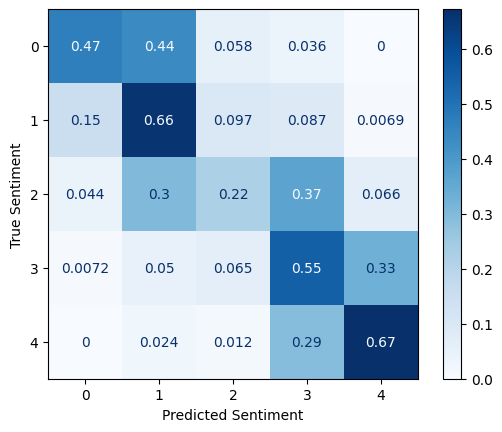

In [36]:
# draw the confusion matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import LinearSegmentedColormap

g = np.array(data[0])
p = np.array(data[1])
cm = confusion_matrix(g, p)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

# 创建一个自定义的colormap，主要颜色为黑色
colors = [(1, 1, 1), (0, 0, 0)]  # 从黑色到白色的渐变
n_bins = 100  # colormap 中的颜色数量
cmap_name = 'black_white'

# 创建一个线性分段的colormap
black_white_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


labels_name = ['0', '1', '2', '3', '4']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_name)
# disp.plot(cmap=black_white_cmap)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.savefig(output_path)

In [34]:
num = 0
for i in range(len(g)):
    if g[i] != p[i]:
        print(g_sentence[i], g_sentiment[i], p_sentiment[i])
        print("\n")
        num += 1
print(num)
# output the 

 It 's a lovely film with lovely performances by Buy and Accorsi . 3 4


 No one goes unindicted here , which is probably for the best . 2 3


 And if you 're not nearly moved to tears by a couple of scenes , you 've got ice water in your veins . 3 4


 Uses sharp humor and insight into human nature to examine class conflict , adolescent yearning , the roots of friendship and sexual identity . 4 3


 Half Submarine flick , Half Ghost Story , All in one criminally neglected film 2 1


 Entertains by providing good , lively company . 3 4


 Unlike the speedy wham-bam effect of most Hollywood offerings , character development -- and more importantly , character empathy -- is at the heart of Italian for Beginners . 4 3


 You 'll gasp appalled and laugh outraged and possibly , watching the spectacle of a promising young lad treading desperately in a nasty sea , shed an errant tear . 3 2


 -LRB- Lawrence bounces -RRB- all over the stage , dancing , running , sweating , mopping his face and